In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
all_data = pd.read_pickle('millionsongsubset.pickle')
all_data.columns

Index(['artist_mbtags', 'release_7digitalid', 'artist_mbid', 'artist_latitude',
       'audio_md5', 'key_confidence', 'artist_longitude', 'artist_terms',
       'artist_playmeid', 'sections_confidence', 'beats_start',
       'artist_location', 'tempo', 'artist_hotttnesss', 'artist_familiarity',
       'artist_name', 'artist_7digitalid', 'segments_start',
       'segments_confidence', 'song_id', 'segments_timbre', 'key',
       'sections_start', 'analysis_sample_rate', 'mode_confidence',
       'start_of_fade_out', 'title', 'beats_confidence',
       'segments_loudness_max', 'tatums_start', 'segments_loudness_start',
       'segments_loudness_max_time', 'bars_confidence', 'time_signature',
       'artist_mbtags_count', 'artist_terms_weight', 'artist_id', 'loudness',
       'similar_artists', 'mode', 'segments_pitches', 'track_id',
       'time_signature_confidence', 'year', 'end_of_fade_in', 'energy',
       'duration', 'danceability', 'track_7digitalid', 'song_hotttnesss',
       'arti

In [3]:
all_data[["title", "song_hotttnesss"]].head(20)

,title,song_hotttnesss
0,b'Trash (live Paris)',0.000000
1,b'The 23rd Psalm',0.000000
2,b'If you Seek Amy',0.289363
3,b'Talk About Me',NaN
4,b'Cheshire Grin',NaN
5,"b""L'Aventurier""",0.499446
6,b'No Loafting',0.000000
7,b'Paloma Consentida',NaN
8,b'Ali Baba',0.372530
9,b'Leave Me Be',NaN


In [4]:
# We will be predicting the song hotttnesss based on the other features, thus I will remove the NaN and 0 values
import math
all_data = all_data[all_data['song_hotttnesss']>0]
all_data[['title', 'song_hotttnesss']].head(20)

,title,song_hotttnesss
2,b'If you Seek Amy',0.289363
5,"b""L'Aventurier""",0.499446
8,b'Ali Baba',0.372530
12,b'True Fuschnick',0.644824
13,b'Inertiatic Esp',0.928617
16,b'Sickness',0.665160
17,b'Sea of Green',0.552457
19,b'Sleepy Lad',0.299877
20,b'Love & Romance',0.340923
25,b'Greener',0.511424


In [5]:
# For the baseline simple model we'll just skip all text columns
# as well as array columns and focus just on the simple values
# https://labrosa.ee.columbia.edu/millionsong/pages/example-track-description
focus = ['danceability', 'duration', 'end_of_fade_in', 'energy', 'key', 'key_confidence', 'loudness',
         'mode', 'mode_confidence','start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'year']
X = all_data[focus]
y = all_data['song_hotttnesss']
X.head(5)

,danceability,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,year
2,0.0,227.08200,0.000,0.0,4,0.038,-4.872,0,0.000,224.253,130.011,5,1.000,0
5,0.0,151.09179,4.528,0.0,2,0.263,-7.246,1,0.404,144.817,98.733,4,0.288,1969
8,0.0,179.09506,0.266,0.0,10,0.782,-6.543,1,0.684,172.286,157.177,4,0.472,2003
12,0.0,237.92281,0.206,0.0,9,0.591,-9.093,1,0.289,230.475,101.871,4,1.000,1992
13,0.0,266.47465,2.322,0.0,6,0.501,-3.952,0,0.612,260.412,112.486,4,0.529,2003


In [6]:
X.describe()

,danceability,duration,end_of_fade_in,energy,key_confidence,loudness,mode_confidence,start_of_fade_out,tempo,time_signature_confidence
count,4214.0,4214.000000,4214.000000,4214.0,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000
mean,0.0,240.851781,0.763662,0.0,0.455312,-9.564174,0.482274,231.926090,124.523167,0.522680
std,0.0,103.117786,1.845112,0.0,0.275462,5.035494,0.189136,101.260295,34.684414,0.371801
min,0.0,10.344040,0.000000,0.0,0.000000,-41.691000,0.000000,10.344000,0.000000,0.000000
25%,0.0,184.848530,0.000000,0.0,0.232500,-12.005000,0.367000,177.397500,97.867250,0.137250
50%,0.0,229.615870,0.188000,0.0,0.482000,-8.431500,0.491000,220.302500,121.641000,0.567500
75%,0.0,279.888528,0.409000,0.0,0.667000,-5.982250,0.609000,269.123750,146.376750,0.876000
max,0.0,1686.752200,32.972000,0.0,1.000000,0.566000,1.000000,1686.752000,258.677000,1.000000


In [7]:
# energy and danceablity are seemingly useless
X = X.drop(['danceability', 'energy'], axis=1)
X.describe()

,duration,end_of_fade_in,key_confidence,loudness,mode_confidence,start_of_fade_out,tempo,time_signature_confidence
count,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000
mean,240.851781,0.763662,0.455312,-9.564174,0.482274,231.926090,124.523167,0.522680
std,103.117786,1.845112,0.275462,5.035494,0.189136,101.260295,34.684414,0.371801
min,10.344040,0.000000,0.000000,-41.691000,0.000000,10.344000,0.000000,0.000000
25%,184.848530,0.000000,0.232500,-12.005000,0.367000,177.397500,97.867250,0.137250
50%,229.615870,0.188000,0.482000,-8.431500,0.491000,220.302500,121.641000,0.567500
75%,279.888528,0.409000,0.667000,-5.982250,0.609000,269.123750,146.376750,0.876000
max,1686.752200,32.972000,1.000000,0.566000,1.000000,1686.752000,258.677000,1.000000


In [8]:
y.describe()

count    4214.000000
mean        0.459482
std         0.168239
min         0.187895
25%         0.313562
50%         0.450762
75%         0.586366
max         1.000000
Name: song_hotttnesss, dtype: float64

In [9]:
# I will make it binary
y = (y > y.median()).astype('int')
y.describe()

count    4214.000000
mean        0.498102
std         0.500056
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: song_hotttnesss, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [11]:
model = LogisticRegression()
model = model.fit(X_train, y_train)
print("train score:",  model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

train score: 0.6424050632911392
test score: 0.6840607210626186


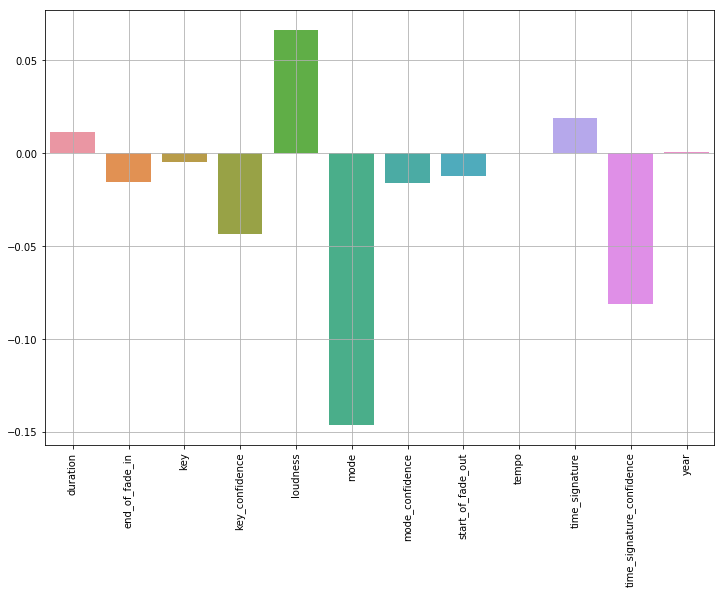

In [12]:
import seaborn as sns
def logistic_regression_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns, y=model.coef_[0], orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)

logistic_regression_features(X_train, model)

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=3)
model = model.fit(X_train, y_train)
print("train score:",  model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

train score: 0.6496835443037975
test score: 0.6707779886148008


So, with no feature engineering we achived 67% accuracy with the RandomForestClassifier and 68% with LogisticRegression